In [18]:
import pandas as pd
import numpy as np
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

### 3 **Delivery Time Prediction Model**

In [2]:
orders = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_orders.csv")
order_items = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_order_items.csv")
customers = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_customers.csv")
feedback = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_customer_feedback.csv")
product = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_products.csv")                             
Marketing = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_marketing_performance.csv")
delivery = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_delivery_performance.csv")
inventory = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_inventory.csv")
inventorynew = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_inventoryNew.csv")

### **Building regression model to predict delivery time in minutes based on factors like distance, promised time, and delivery partner**


In [3]:
# Load delivery data
delivery = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_delivery_performance.csv")

# disply delivery columns and data types
print(delivery.info())
display(delivery.head())

# Select relevant features from delivery performance data
features = ['distance_km', 'promised_time_minutes', 'delivery_partner'] 
target = 'delivery_time_minutes'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               5000 non-null   int64  
 1   delivery_partner_id    5000 non-null   int64  
 2   promised_time          5000 non-null   object 
 3   actual_time            5000 non-null   object 
 4   delivery_time_minutes  5000 non-null   float64
 5   distance_km            5000 non-null   float64
 6   delivery_status        5000 non-null   object 
 7   reasons_if_delayed     3098 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 312.6+ KB
None


,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,NaN
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,NaN
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic


In [ ]:
# Load delivery data
delivery = pd.read_csv(r"E:/Amruta Study material/Data Anaylist_WS cube/Capstone Project/Project 3/Blinkit/blinkit_delivery_performance.csv")

# disply delivery columns
print(delivery.columns)
print(delivery.head())

In [6]:
# Create merged_delivery to club all required column all togather
merged_delivery = delivery.copy()

In [7]:
# required columns
required = ['distance_km', 'promised_time', 'delivery_partner_id', 'delivery_time_minutes']
missing = [col for col in required if col not in merged_delivery.columns]
print("Missing columns:", missing)

Missing columns: []


In [8]:
# Feature engineering- extract date time feature
X = merged_delivery[['distance_km', 'promised_time', 'delivery_partner_id']].copy()
y = merged_delivery['delivery_time_minutes']

In [9]:
# Convert 'promised_time' to datetime and extract hour, day of week
X['promised_time'] = pd.to_datetime(X['promised_time'])
X['promised_hour'] = X['promised_time'].dt.hour
X['promised_day_of_week'] = X['promised_time'].dt.dayofweek
X = X.drop('promised_time', axis=1)

In [10]:
# define encode 'delivery_partner_id'
X = pd.get_dummies(X, columns=['delivery_partner_id'], drop_first=True)

In [11]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [12]:
# Train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### **Evaluated the model's accuracy and interpreted important features**

In [15]:
# Predict and evaluate the delivery data
y_pred = model.predict(X_test)
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")

MAE: 6.10
RMSE: 7.87
R2 Score: -0.00


In [16]:
# evaluating Feature importance 
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)
print("\nFeature Importances (Linear Regression Coefficients):")
print(coef_df)


Feature Importances (Linear Regression Coefficients):
                        Feature  Coefficient
3112  delivery_partner_id_62428    25.912803
3072  delivery_partner_id_61678    25.776795
1133  delivery_partner_id_22930    25.739697
4809  delivery_partner_id_95971    25.693669
1698  delivery_partner_id_34016    25.594355
...                         ...          ...
2627  delivery_partner_id_53012     0.000000
3136  delivery_partner_id_62842     0.000000
4216  delivery_partner_id_84395     0.000000
4226  delivery_partner_id_84527     0.000000
4902  delivery_partner_id_97687     0.000000

[5002 rows x 2 columns]


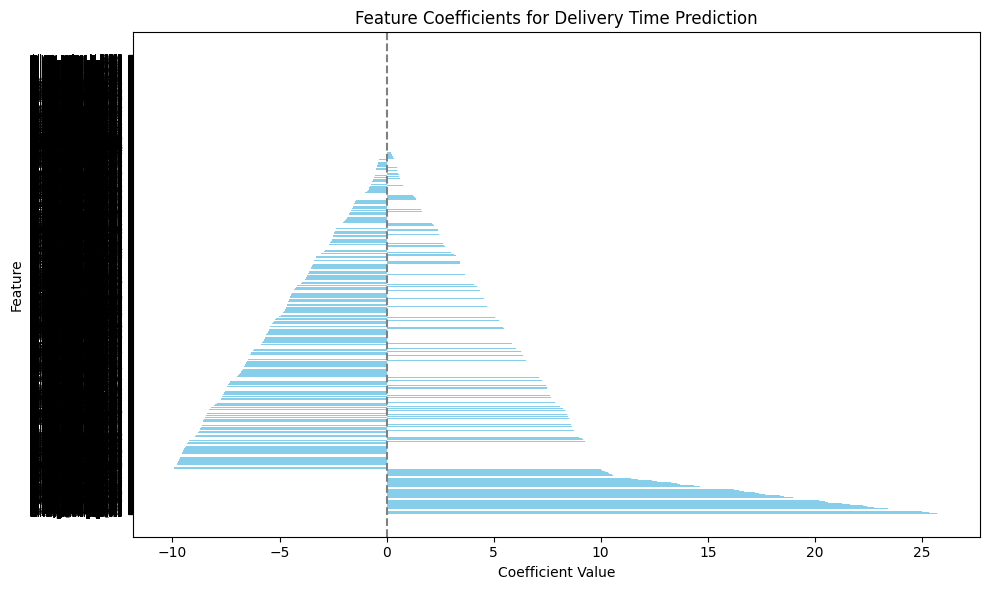

In [22]:
plt.figure(figsize=(10, 6))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], color='skyblue')
plt.axvline(x=0, color='gray', linestyle='--')
plt.title("Feature Coefficients for Delivery Time Prediction")
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.yticks(fontsize=5,rotation=0)
plt.tight_layout()
plt.show()

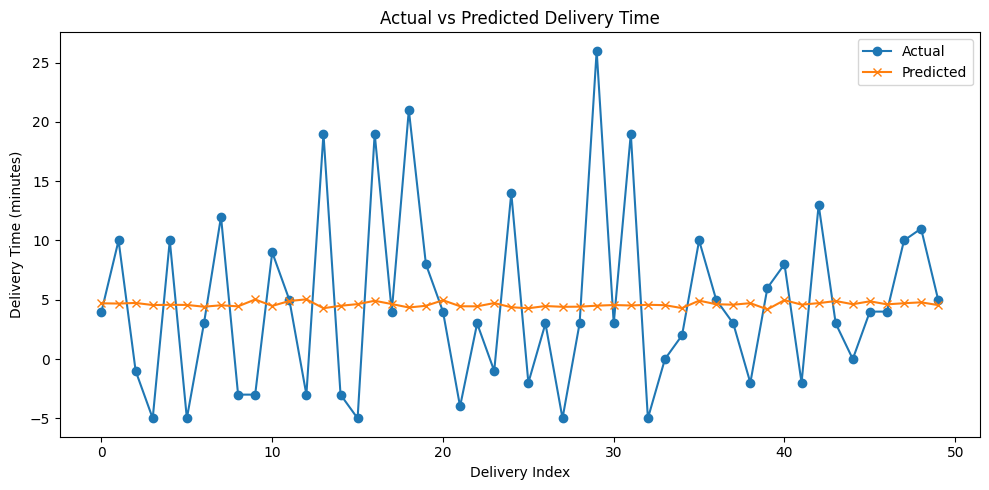

In [23]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label='Actual', marker='o')      
plt.plot(y_pred[:50], label='Predicted', marker='x')
plt.xlabel('Delivery Index')
plt.ylabel('Delivery Time (minutes)')
plt.title('Actual vs Predicted Delivery Time')
plt.legend()
plt.tight_layout()
plt.show()

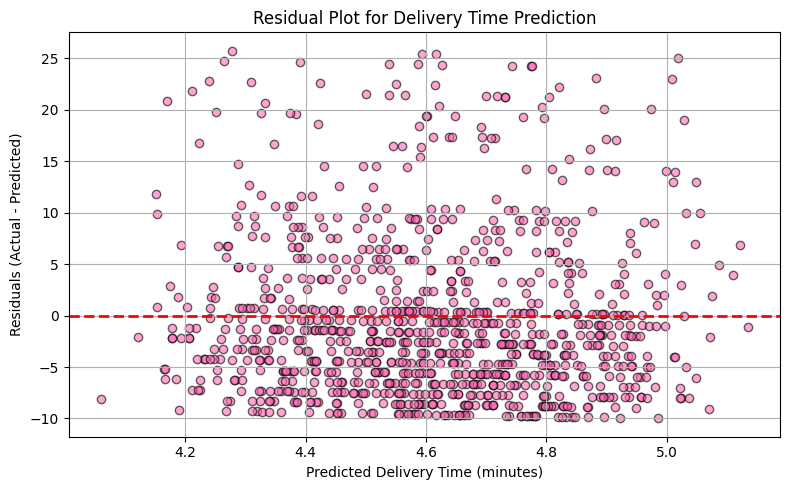

In [36]:
plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, alpha=0.6, color='hotpink', edgecolors='black')
plt.axhline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel('Predicted Delivery Time (minutes)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot for Delivery Time Prediction')
plt.grid(True)
plt.tight_layout()
plt.show()

In [24]:
residuals = y_test - y_pred

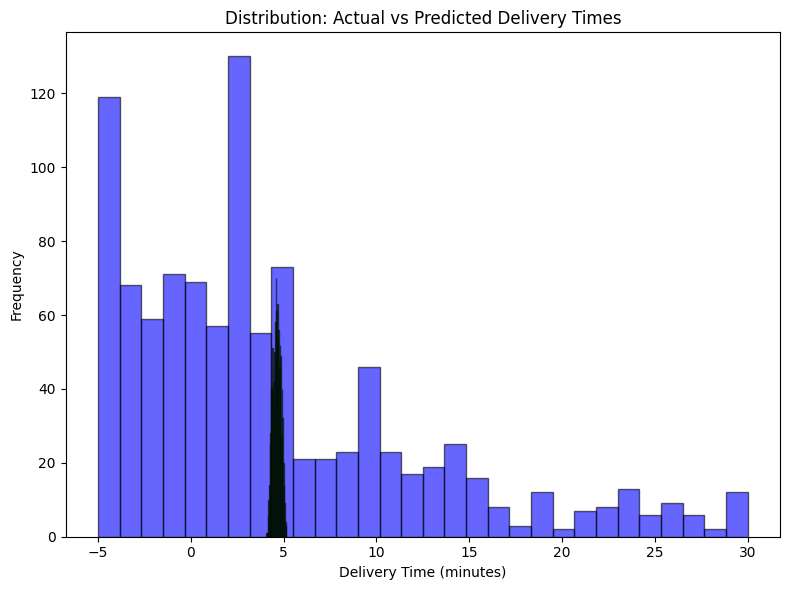

In [35]:
plt.figure(figsize=(8, 6))
plt.hist(y_test, bins=30, alpha=0.6, label='Actual', color='blue', edgecolor='black')
plt.hist(y_pred, bins=30, alpha=0.6, label='Predicted', color='green', edgecolor='black')
plt.xlabel("Delivery Time (minutes)")
plt.ylabel("Frequency")
plt.title("Distribution: Actual vs Predicted Delivery Times")
plt.legend
plt.tight_layout()
plt.show()